# 03 - Training Results - Networks Fine-tuned on Selected Loss Function (SnakeCLEF)

In [1]:
import os

os.chdir('..')

In [2]:
import numpy as np
import pandas as pd

from src.utils import visualization as viz
from src.dev import results

DATA_DIR = 'data/snake_clef2021_dataset/training_history/baselines_with_loss/'


def get_result_df(df, params):
    group_dict = {
        'EfficientNet-B0': results.filter_items(df, outlen=30, model='efficientnet_b0', **params),
        'ViT-Base-224': results.filter_items(df, outlen=30, model='vit_base_224', **params),

        'EfficientNet-B4': results.filter_items(df, outlen=30, model='efficientnet_b4', **params),
        'NoisyStudent-B4': results.filter_items(df, outlen=30, model='efficientnet_b4_ns', **params),
        'EfficientNetV2-S': results.filter_items(df, outlen=30, model='efficientnetv2_s', **params),

        'ViT-Base-384': results.filter_items(df, outlen=30, model='vit_base_384', **params),
        'DeiT-Base-384': results.filter_items(df, outlen=30, model='deit_base_384', **params),
        'BEiT-Base-384': results.filter_items(df, outlen=30, model='beit_base_384', **params),

        # 'ViT-Large-224': results.filter_items(df, outlen=30, model='vit_large_224', **params),
        'ViT-Large-384': results.filter_items(df, outlen=30, model='vit_large_384', **params)
    }
    result_df = results.get_metrics_and_time_df(group_dict, primary_metric='f1_score')
    return result_df, group_dict


# load specification and progress data
specs_df = results.load_specs_files(DATA_DIR)
df = results.load_progress_files(specs_df, path=DATA_DIR)
specs_df

,model_name,history_file,specs_name,model,loss,opt,no_epochs,batch_size,total_batch_size,learning_rate,weight,dataset,scheduler,beta,pretrained_checkpoint,input_size,image_mean,image_std,date
0,clef2021_efficientnet_b4_ns_ce_12-01-2021_09-3...,clef2021_efficientnet_b4_ns_ce_12-01-2021_09-3...,clef2021_efficientnet_b4_ns_ce_12-01-2021_09-3...,efficientnet_b4_ns,ce,sgd,30,32,64,0.01,none,full_cleaned,reduce_lr_on_plateau,NaN,tf_efficientnet_b4_ns,380,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",01-2021_09-37-32
1,clef2021_efficientnet_b4_ce_12-01-2021_21-42-26,clef2021_efficientnet_b4_ce_12-01-2021_21-42-2...,clef2021_efficientnet_b4_ce_12-01-2021_21-42-2...,efficientnet_b4,ce,sgd,30,32,64,0.01,none,full_cleaned,reduce_lr_on_plateau,NaN,tf_efficientnet_b4,380,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",01-2021_21-42-26
2,clef2021_efficientnetv2_s_ce_12-02-2021_14-00-43,clef2021_efficientnetv2_s_ce_12-02-2021_14-00-...,clef2021_efficientnetv2_s_ce_12-02-2021_14-00-...,efficientnetv2_s,ce,sgd,30,64,64,0.01,none,full_cleaned,reduce_lr_on_plateau,NaN,tf_efficientnetv2_s,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",02-2021_14-00-43
3,clef2021_vit_base_224_ce_12-22-2021_15-35-04,clef2021_vit_base_224_ce_12-22-2021_15-35-04.csv,clef2021_vit_base_224_ce_12-22-2021_15-35-04.json,vit_base_224,ce,sgd,30,64,64,0.01,class_balanced,full_cleaned,reduce_lr_on_plateau,0.9,google/vit-base-patch16-224,224,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",22-2021_15-35-04
4,clef2021_deit_base_384_ce_12-22-2021_15-35-07,clef2021_deit_base_384_ce_12-22-2021_15-35-07.csv,clef2021_deit_base_384_ce_12-22-2021_15-35-07....,deit_base_384,ce,sgd,30,32,64,0.01,class_balanced,full_cleaned,reduce_lr_on_plateau,0.9,facebook/deit-base-patch16-384,384,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",22-2021_15-35-07
5,clef2021_vit_base_384_ce_12-23-2021_05-56-12,clef2021_vit_base_384_ce_12-23-2021_05-56-12.csv,clef2021_vit_base_384_ce_12-23-2021_05-56-12.json,vit_base_384,ce,sgd,30,32,64,0.01,class_balanced,full_cleaned,reduce_lr_on_plateau,0.9,google/vit-base-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",23-2021_05-56-12
6,clef2021_beit_base_384_ce_12-23-2021_22-51-08,clef2021_beit_base_384_ce_12-23-2021_22-51-08.csv,clef2021_beit_base_384_ce_12-23-2021_22-51-08....,beit_base_384,ce,sgd,30,32,64,0.01,class_balanced,full_cleaned,reduce_lr_on_plateau,0.9,microsoft/beit-base-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",23-2021_22-51-08
7,clef2021_vit_large_384_ce_12-24-2021_13-12-48,clef2021_vit_large_384_ce_12-24-2021_13-12-48.csv,clef2021_vit_large_384_ce_12-24-2021_13-12-48....,vit_large_384,ce,sgd,30,16,64,0.01,class_balanced,full_cleaned,reduce_lr_on_plateau,0.9,google/vit-large-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",24-2021_13-12-48
8,clef2021_efficientnet_b0_ce_11-29-2021_16-52-38,clef2021_efficientnet_b0_ce_11-29-2021_16-52-3...,clef2021_efficientnet_b0_ce_11-29-2021_16-52-3...,efficientnet_b0,ce,sgd,30,64,64,0.01,none,full_cleaned,reduce_lr_on_plateau,NaN,tf_efficientnet_b0,224,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",29-2021_16-52-38


,accuracy,top_3,f1_score,mean_epoch_time,total_time
EfficientNet-B0,85.1,94.2,70.6,24m,11h 32m
ViT-Base-224,87.5,94.3,75.5,29m,14h 20m
EfficientNet-B4,91.4,96.9,80.2,57m,28h 23m
NoisyStudent-B4,91.7,97.4,81.0,57m,28h 23m
EfficientNetV2-S,91.6,96.0,81.3,48m,23h 56m
ViT-Base-384,91.7,97.3,82.0,1h 02m,30h 51m
DeiT-Base-384,90.6,96.7,81.2,1h 03m,31h 15m
BEiT-Base-384,93.7,97.8,84.6,1h 12m,35h 32m
ViT-Large-384,92.0,97.5,82.9,2h 47m,83h 24m


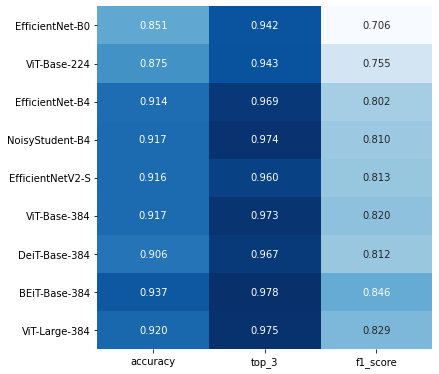

In [3]:
params = dict(loss='ce', opt='sgd', total_batch_size=64)
result_df, group_dict = get_result_df(df, params)
viz.heatmap(result_df)
result_df.round(3) * ([100] * 3 + [1, 1])

In [5]:
BASELINES_DATA_DIR = 'data/snake_clef2021_dataset/training_history/baselines/'

# load specification and progress data
baselines_specs_df = results.load_specs_files(BASELINES_DATA_DIR)
baselines_df = results.load_progress_files(baselines_specs_df, path=BASELINES_DATA_DIR)

params = dict(loss='ce', opt='sgd', total_batch_size=64)
baselines_result_df, _ = get_result_df(baselines_df, params)

In [6]:
_baselines_result_df = baselines_result_df.copy()
_baselines_result_df.columns = pd.MultiIndex.from_product([_baselines_result_df.columns, ['Baseline']])
_result_df = result_df.copy()
_result_df.columns = pd.MultiIndex.from_product([_result_df.columns, ['Adj. Loss']])

eval_df = pd.concat([_baselines_result_df, _result_df], axis=1)
for met in ['accuracy', 'top_3', 'f1_score']:
    eval_df[met, 'Diff'] = eval_df[met, 'Adj. Loss'] - eval_df[met, 'Baseline']

_df = eval_df[['accuracy', 'top_3', 'f1_score']].round(3) * 100
for met in ['accuracy', 'top_3', 'f1_score']:
    _df[met, 'Diff'] = '+' + _df[met, 'Diff'].round(1).fillna('').astype(str).replace('+', np.nan)
    _df[met, 'Diff'] = _df[met, 'Diff'].str.replace('+-', '-', regex=False)
_df

accuracy                    top_3                 f1_score  \
                 Baseline Adj. Loss  Diff Baseline Adj. Loss  Diff Baseline   
EfficientNet-B0      85.1      85.1  +0.0     94.2      94.2  +0.0     70.6   
ViT-Base-224         89.9      87.5  -2.3     95.6      94.3  -1.3     76.0   
EfficientNet-B4      91.4      91.4  +0.0     96.9      96.9  +0.0     80.2   
NoisyStudent-B4      91.7      91.7  +0.0     97.4      97.4  +0.0     81.0   
EfficientNetV2-S     91.6      91.6  +0.0     96.0      96.0  +0.0     81.3   
ViT-Base-384         91.0      91.7  +0.6     97.3      97.3  +0.0     81.2   
DeiT-Base-384        92.0      90.6  -1.4     96.9      96.7  -0.2     81.3   
BEiT-Base-384        93.5      93.7  +0.2     97.7      97.8  +0.1     84.0   
ViT-Large-384        91.9      92.0  +0.1     97.7      97.5  -0.1     83.0   

                                  
                 Adj. Loss  Diff  
EfficientNet-B0       70.6  +0.0  
ViT-Base-224          75.5  -0.5  
EfficientNet-B4       80.2  +0.0  
NoisyStudent-B4       81.0  +0.0  
EfficientNetV2-S      81.3  +0.0  
ViT-Base-384          82.0  +0.7  
DeiT-Base-384         81.2  -0.1  
BEiT-Base-384         84.6  +0.5  
ViT-Large-384         82.9  -0.0

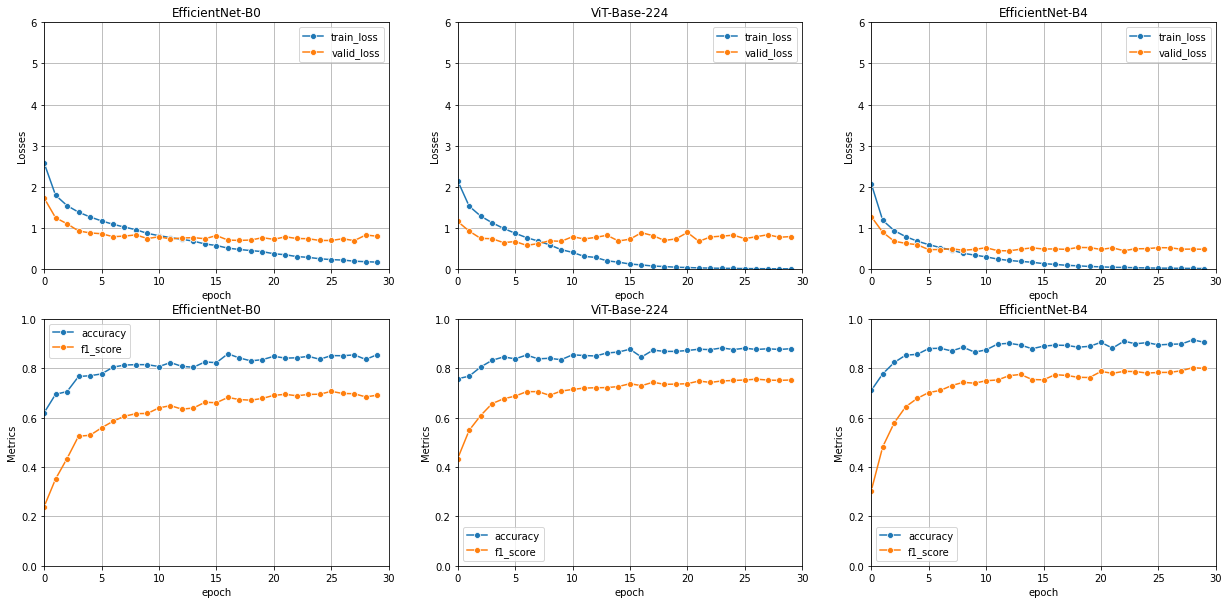

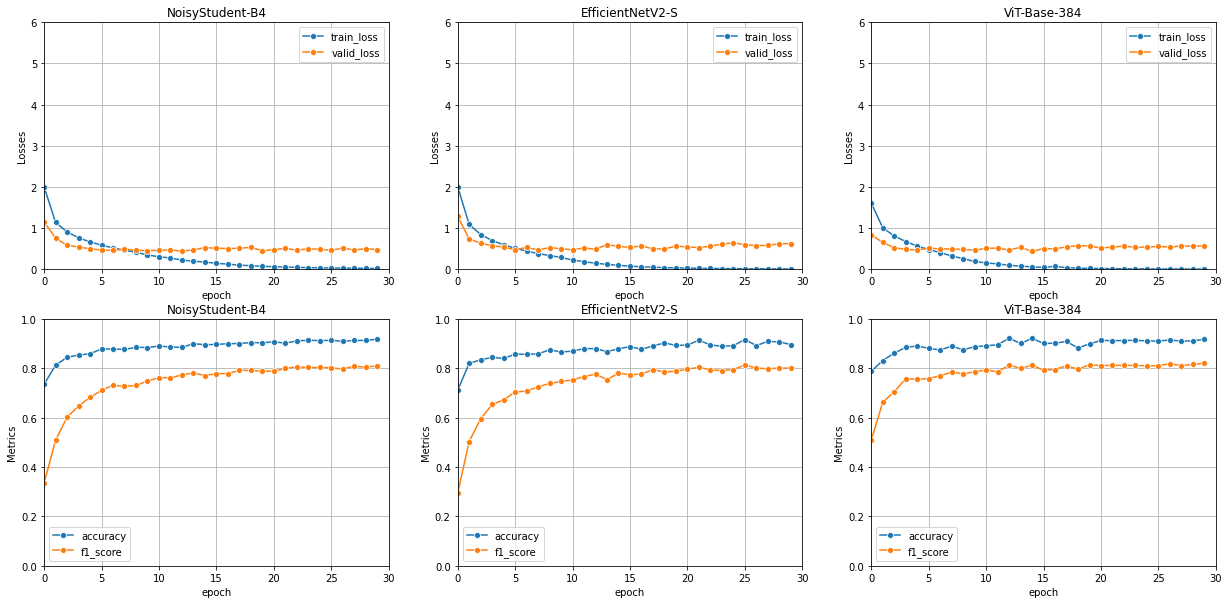

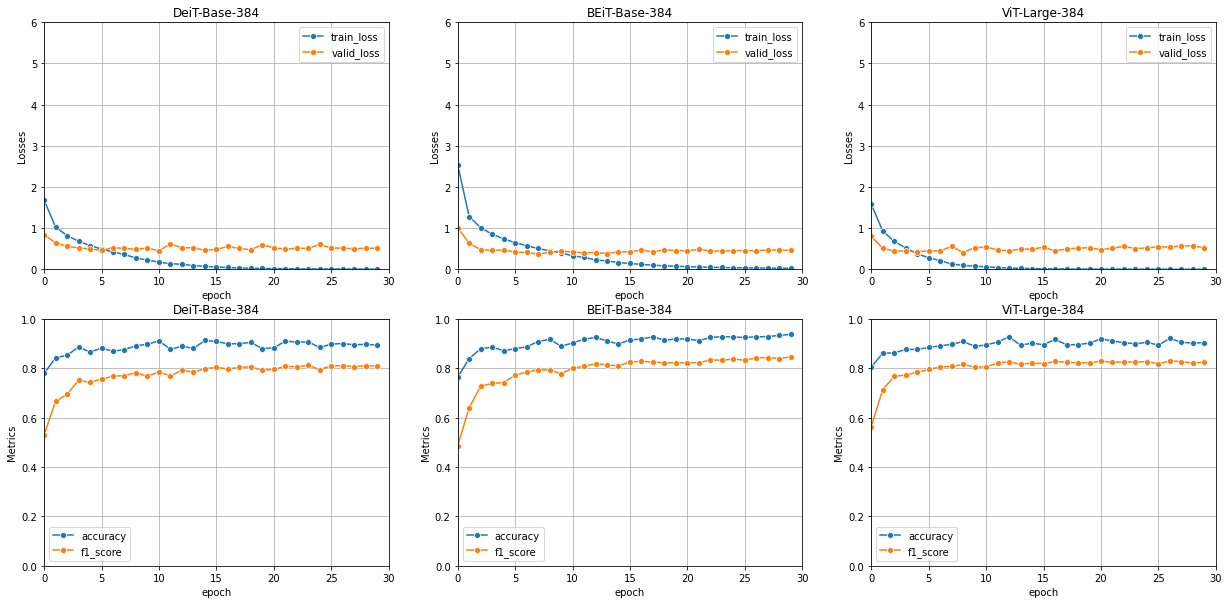

In [7]:
results.compare_training_process(group_dict, xlim=[0, 30])